In [2]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import pandas as pd
import re
import numpy as np 
import math
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import MinMaxScaler
from deap import algorithms, base, creator, tools
from nltk import word_tokenize
import re, string
import random
import statistics 
from statistics import mean
import matplotlib.pyplot as plt
import numpy

[nltk_data] Downloading package punkt to /home/spetz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
dict_freq = {}  # frequency map for words in list
dict_paired_freq = {}

path = '/home/spetz/Downloads/DeliciousMIL/Data/train-data.dat'
clean_files = []
df = pd.DataFrame()

file = open(path).readlines()
len(file)

#clear data
clear_file=[]
for i in range(len(file)):
    x=re.sub('<.*?>','',file[i])
    clear_file.append(x)

clear_file=clear_file[:]

#perasma tou clear keimenou sto words string
words = ''
for line in clear_file:
    words += line


tokenized_words = word_tokenize(words) # list of all words in new dictionary
WORD_LIST = list(set(tokenized_words)) # create a set out of words so there are no repeats in word list and make list again
dictionary_size = len(WORD_LIST) #6853


#Dhmiourgia dictionary lekseis kai suxnotitas emfanisi tis lekseis se olo to keimeno
for word in tokenized_words: #gia kathe word sto lista leksewn olou tou keimenou
    if word not in dict_freq: 
        dict_freq[word] = 1
    else:
        dict_freq[word] += 1

In [4]:
#TF = (Frequency of the word in the sentence) / (Total number of words in the sentence)
def computeTF(wordDict,bow):
    tfDict={}
    bowCount=len(bow)
    for word,count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

tf=computeTF(dict_freq,tokenized_words)

#IDF: log((Total number of sentences (documents))/(Number of sentences (documents) containing the word))
def computeIDF(docList):
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(dict_freq,0)
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / (float(val) + 1))
        
    return idfDict

idf=computeIDF(dict_freq)
len(idf)

8520

In [5]:
#FINAL TF-IDF
def computeDFIDF(tfbow,idfs):
    tfidf={}
    for word,val in tfbow.items():
        tfidf[word] = val*idfs[word]

    return tfidf

In [6]:
#final TF-IDF
Tf_idf=computeDFIDF(tf,idf)
#Apothikeusi mono ton timwn
new_list = list(Tf_idf.values())
len(new_list)
tf_idf_Xtrain = np.asarray(new_list)


In [7]:
#Create a FitnessMax class 
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
#Create an Individual class 
creator.create("Individual", list, fitness=creator.FitnessMax)

def getFitness(individual):
    counter = 0
    fitness = 0

    #gia kathe thesi sto indi
    for word_index in individual:
        #vale sto string thn antistoixi leksi
        if new_list[word_index] <= 1:
            fitness += new_list[word_index]
        
        else:
            fitness -=20
    
    return fitness,

        
#The toolbox is a container for functions with their arguments
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(new_list))
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
# Register the genetic operators	
toolbox.register("evaluate", getFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

1 ITERATION 
-- Generation 1 --
 Max fitness:15.591211973195517 && Average fitness:15.542232837828829
-- Generation 2 --
 Max fitness:15.60428224808269 && Average fitness:15.569233274108914
-- Generation 3 --
 Max fitness:15.60840970331022 && Average fitness:15.586052654161099
-- Generation 4 --
 Max fitness:15.615288795356102 && Average fitness:15.591831091479634
-- Generation 5 --
 Max fitness:15.629046979447871 && Average fitness:15.598778974445981
-- Generation 6 --
 Max fitness:15.6331744346754 && Average fitness:15.606105207474846
-- Generation 7 --
 Max fitness:15.670321531723168 && Average fitness:15.620620091691663
-- Generation 8 --
 Max fitness:15.671009440927756 && Average fitness:15.636545189777882
-- Generation 9 --
 Max fitness:15.671009440927756 && Average fitness:15.645900754960284
-- Generation 10 --
 Max fitness:15.684079715814926 && Average fitness:15.660828384699846
-- Generation 11 --
 Max fitness:15.697837899906695 && Average fitness:15.668395385950319
-- Generat

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 Max fitness:15.692334626269977 && Average fitness:15.673864264126774
-- Generation 25 --
 Max fitness:15.692334626269977 && Average fitness:15.67806051027477
-- Generation 26 --
<-------------------ITERATION 10 COMPLETED ----------------->
 Max fitness:15.69508626308833 && Average fitness:15.681878406360232
<------------------------- APOTELESMATA ------------------------>
Avg for generations: 14.461538461538462
Best fitness of best individual: 15.746679453432462
Avg fitness of best individual: 15.738554187404418


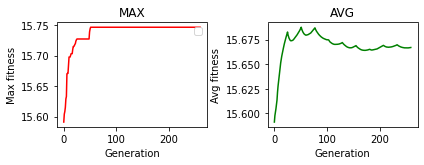

Best solution of best individual: [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [8]:
population_size=20
prob_cross = 0.6
prob_mutation = 0.2
genererations = 10

averege_Fitness_all_gen=list()
maxFitness_all_gen=list()
Howmanygenerations =list()
BestFitnessForAllGens =list()
BestFitnessPerGens =list()
BestFitness = list()
genbest=list()
best={}
final_Bestfitness=list()
X=[]

def main(population_size,prob_cross,prob_mutation):
  
  
  for i in range(10): # iterations
      print("%d ITERATION "%(i+1))

       # dimiourgia plithismou
      pop = toolbox.population(n=population_size)

    #Evaluation fitness function 
      fitnesses = list(map(toolbox.evaluate, pop))
      for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

   
  
    # CXPB pithanotita zeugaromatos
    # MUTPB pithanotita metalakseis
      CXPB, MUTPB = prob_cross, prob_mutation

      #Statistics
      stats = tools.Statistics(key=lambda ind:ind.fitness.values)
      record = stats.compile(pop)
      log = tools.Logbook()
      log.record(gen=0, **record)

	# Extracting all the fitnesses of (epistrefi to fitness)
      fits = [ind.fitness.values[0] for ind in pop]
	
    # Variable keeping track of the number of generations
    #metritis gia generation
      generation=0
      #Save to fitness pou exoume
      previous_fit=max(fits)
      #best fitness apo oles tis genies
      bestfitness=0
  #creteria 
      g = 1
      critiria = False 
      max_g=50
      fitness_unchanged = 0

  # Begin the evolution
      while critiria==False :
        generation +=1

    # A new generation
        print("-- Generation %i --" % generation) 

    # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
    # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring)) 

    # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values


    # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

    # Replace the old population by the offspring
        pop[:] = offspring

    
    # Gather all the fitnesses in one list and print the stats
        fitness = [ind.fitness.values[0] for ind in pop]

        record = stats.compile(pop)
        log.record(gen=g, **record)  
        best = log.select("max")

    #CRETERIA FOR WHILE LOOP(OSO TO TERM=FALSE trexei h while)
        # reached max number of generations
        if g >= max_g:
            critiria = True
            print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))
        # best individual of gen is <1% better than best individual of previous gen
        elif (g > 25) and max(fits) < (1.001*previous_fit):
            critiria = True
            print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))
        # best individual of gen is same as best individual of previous gen
        elif (g > 25) and previous_fit == max(fits):
            fitness_unchanged += 1
            #ean g>25 kai exw 5 fores stasimo fitness tote critiria=True
            if fitness_unchanged >= 5:
                critiria = True
                print("<-------------------ITERATION %d COMPLETED ----------------->" %(i+1))
            else:
                g += 1
        # else continue
        else:
            fitness_unchanged = 0
            g += 1



      
#------------------------------------EKTELESI GIA KATHE GENIA-----------------------------------------------------------------------------
        #GIA KATHE GENERATION:
        maxFitness_per_gen=(max(fitness))
        average_fitness_per_gen = ((sum(fitness)/len(pop)))
        print(" Max fitness:%s && Average fitness:%s" %((maxFitness_per_gen),(average_fitness_per_gen)))
    

#--------------------------------------TO MEGALITERO KATHE GENIAS KAI TO ANTISTOIXO AVG ----------------------------------------------------------------------
        maxFitness_all_gen.append(maxFitness_per_gen)
        averege_Fitness_all_gen.append(average_fitness_per_gen)

        #TWRA THELOUME APO OLES TIS GENIES NA KRATISOUME MONO ENA, TO MEGALITERO 
        final_Bestfitness.append(max(maxFitness_all_gen))

#----------------------------------------------SUNOLIKES GENIES EKTELESIS---------------------------------------------------------------------------------
        Howmanygenerations.append(g)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
        #PREPEI NA VROUME TO BEST FITNESS 
        best_fitness =max(fitness)
        if best_fitness > bestfitness:
            bestfitness = best_fitness
            Bestindex =pop[fitness.index(best_fitness)]
        BestFitnessPerGens.append(best_fitness)

         
        #Vale stin lista mono to megalutero stoixio pou vrikes
        BestFitnessForAllGens.append(max(BestFitnessPerGens))
        X.append(mean(BestFitnessPerGens))
#################################################################################
      

################################################################################ 

  best_ind =tools.selBest(pop,1)[0]
  print("<------------------------- APOTELESMATA ------------------------>")
  print("Avg for generations:",mean(Howmanygenerations))
  print("Best fitness of best individual:",np.amax(max(BestFitnessForAllGens)))
  print("Avg fitness of best individual:",np.mean(BestFitnessForAllGens))


  plt.figure(0)
  plt.subplot(2, 2, 1)
  plt.plot(BestFitnessForAllGens,color='red')
  plt.title("MAX")
  plt.ylabel("Max fitness")
  plt.xlabel("Generation")
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.plot(X,color="green")
  plt.title("AVG")
  plt.ylabel("Avg fitness")
  plt.xlabel("Generation")
  plt.tight_layout()
  plt.show()

  print("Best solution of best individual:",(best_ind))

  return best_ind
 
keep = main(population_size,prob_cross,prob_mutation)  


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
tf_idf_Xtrain=tf_idf_Xtrain[:8251]
labels_fnames = [
            '/home/spetz/Downloads/DeliciousMIL/Data/train-label.dat',
            ]
y = pd.read_csv(labels_fnames[0] , delimiter = ' ', header = None)


clean_doc = []
wordfreq = {}
for doc in file:
    tokens = nltk.word_tokenize(doc)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
            
from nltk.probability import FreqDist
fdist = FreqDist()

sentence_vectors = []
for doc in file:
    doc_tokens = nltk.word_tokenize(doc)
    vec = []
    for token in wordfreq:
        if token in doc_tokens:
            count = 0
            for tok in doc_tokens:
                if tok == token:
                    count += 1
            vec.append(count)
        else:
            vec.append(0)
    sentence_vectors.append(vec)




In [10]:
X_train =np.array(sentence_vectors)
X_train.shape

(8251, 8522)

In [11]:
X_train.shape
for i in range(len(keep)):
    if keep[i] == 0:
        X_train[:,i] = 0
        
       
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y, test_size=0.3, random_state=0)  

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5775, 8522) (2476, 8522) (5775, 20) (2476, 20)


In [12]:
scaler = MinMaxScaler()

X_train_minmax=X_train[:,:-957]
X_test_minmax=X_test[:,:-957]
print(X_train_minmax.shape,X_test_minmax.shape,Y_train.shape,Y_test.shape)


(5775, 7565) (2476, 7565) (5775, 20) (2476, 20)


In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
model = tf.keras.models.load_model("/home/spetz/Downloads/ce.h5") 

2022-06-02 22:15:20.125348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-02 22:15:20.125370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-02 22:15:22.247850: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-02 22:15:22.247875: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-02 22:15:22.247892: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (spetz-ZenBook-UX434IQ-Q407IQ): /proc/driver/nvidia/version does not exist
2022-06-02 22:15:22.248511: I tensorflow/core/pl

In [14]:
loss2, accuracy2 = model.evaluate(X_test_minmax, Y_test, verbose=0)
print("Accuracy for  retrained model is", accuracy2)
print("Lose for retrained model is ",loss2)



Accuracy for  retrained model is 0.3659127652645111
Lose for retrained model is  0.5216124653816223


In [15]:

import tensorflow as tf
import re
import pandas as pd
import numpy as np
import nltk

from nltk import word_tokenize,sent_tokenize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow.python.keras.optimizer_v1 import SGD
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
from sklearn import preprocessing



def create_model():
    model = Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(2896, activation='relu', input_shape=(5775,)))
    model.add(Dense(20, activation='sigmoid'))
    # optimizer = keras.optimizers.Adam(lr=0.01)
    opt = tf.keras.optimizers.SGD(learning_rate=0.05,momentum = 0.6)
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model 

def evaluate_model(X_train_normalized,Y_train,X_test_normalized,Y_test):            
    fold_number2=0
    fold_number = 0
    sum_of_acc2 =0
    sum_of_loss2 = 0
    sum_of_acc=0
    sum_of_loss=0
    losses,scores,histories = list(),list(),list()
    losses2,scores2,histories2 = list(),list(),list()
    kfold = KFold(n_splits=5, shuffle=False, random_state=None)
    epochs = 30
    
    for train_index, test_index in kfold.split(X_train_normalized,Y_train):  
        ce = create_model()
        #es=EarlyStopping(monitor='val_loss' , mode='min' , verbose=1)
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_train_normalized[train_index,:], X_train_normalized[test_index,:]
        y_train, y_test = Y_train.iloc[train_index],Y_train.iloc[test_index]
    
        #MODEL for cross-entropy

        history = ce.fit(X_train_normalized[train_index,:],Y_train.iloc[train_index] , epochs=epochs , validation_data=(X_test, y_test) ,verbose=1)
        loss, val_acc = ce.evaluate(X_test_normalized,Y_test,verbose=1)
        #MODEL 2 for Mse
        savemodel=ce.save("ce.h5")
	     

        print("-"*80)
        ###########################
        fold_number +=1 
        fold_number2 +=1
        ##########################
        print(" for cross entropy fold",(fold_number),"\n|  loss:" , loss, "Accuracy:",val_acc)
        ##########################
        sum_of_acc += val_acc
        sum_of_loss += loss
        #########################
    

        scores.append(val_acc)
        histories.append(history)
  

        print("-"*80)
        print("\n Cross-Entropy:the average of the loss and acc is: \n","loss:" , sum_of_loss/fold_number, "\n" , "Accuracy" , sum_of_acc/fold_number,"\n")
  
        
    return history


In [16]:
evaluate_model(X_train_minmax,Y_train,X_test_minmax,Y_test)

Epoch 1/30


2022-06-02 22:21:00.249862: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 279602400 exceeds 10% of free system memory.


109/145 [=====================>........] - ETA: 2s - loss: 0.4469 - accuracy: 0.2451

KeyboardInterrupt: 